## Artificial Neural Network with Softmax activation function

In [5]:
from IPython.display import Image

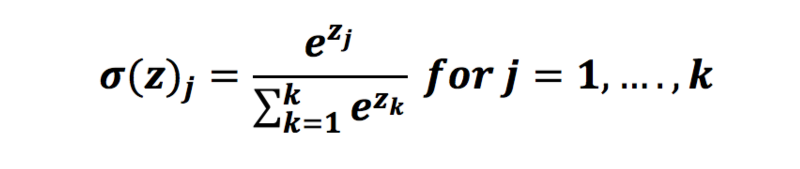

In [8]:
Image(filename="formulas/softmax_function.png")

This function regression returns a value between 0 and 1.

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
from tensorflow.examples.tutorials.mnist import input_data

In [17]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [19]:
mnist.train.num_examples

55000

In [20]:
mnist.test.num_examples

10000

In [21]:
%matplotlib inline

In [22]:
single_image = mnist.train.images[1].reshape(28, 28)

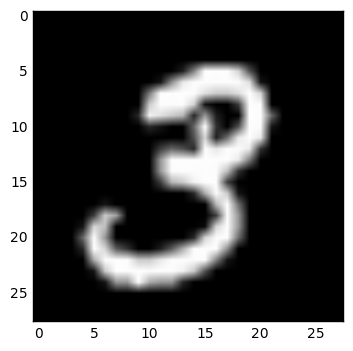

In [23]:
plt.imshow(single_image, cmap='gist_gray')

The Data is already normalized

In [24]:
single_image.min()

0.0

In [25]:
single_image.max()

1.0

In [30]:
#PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None,784])
#Each image has 784 pixels

In [31]:
#VARIABLES
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [32]:
#CREATE GRAPH OPERATIONS
y = tf.matmul(x,W) + b

In [38]:
#PLACEHOLDER
y_true = tf.placeholder(tf.float32,[None,10])

In [42]:
#LOSS FUNCTION
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [43]:
#OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [44]:
#CREATE SESSION
init = tf.global_variables_initializer()

In [48]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
    
    # EVALUATE THE MODEL
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    # My predictions should be like this
    # [True, False, True....] -->[1,0,1..]
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # PREDICTED [3,4] TRUE [3,9]
    # [True, False]
    # [1.0, 0.0]
    # 0.5
    
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9191
